# NBA Playoff Prediction Project
Using Regression Techniques (Linear & Polynomial)

In [3]:
import opendatasets

opendatasets.download('https://www.kaggle.com/datasets/bluedreamv1b3/nba-teams-stat-2000-2023')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  Samir Abukar1


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/bluedreamv1b3/nba-teams-stat-2000-2023


100%|██████████| 120k/120k [00:00<00:00, 4.91MB/s]

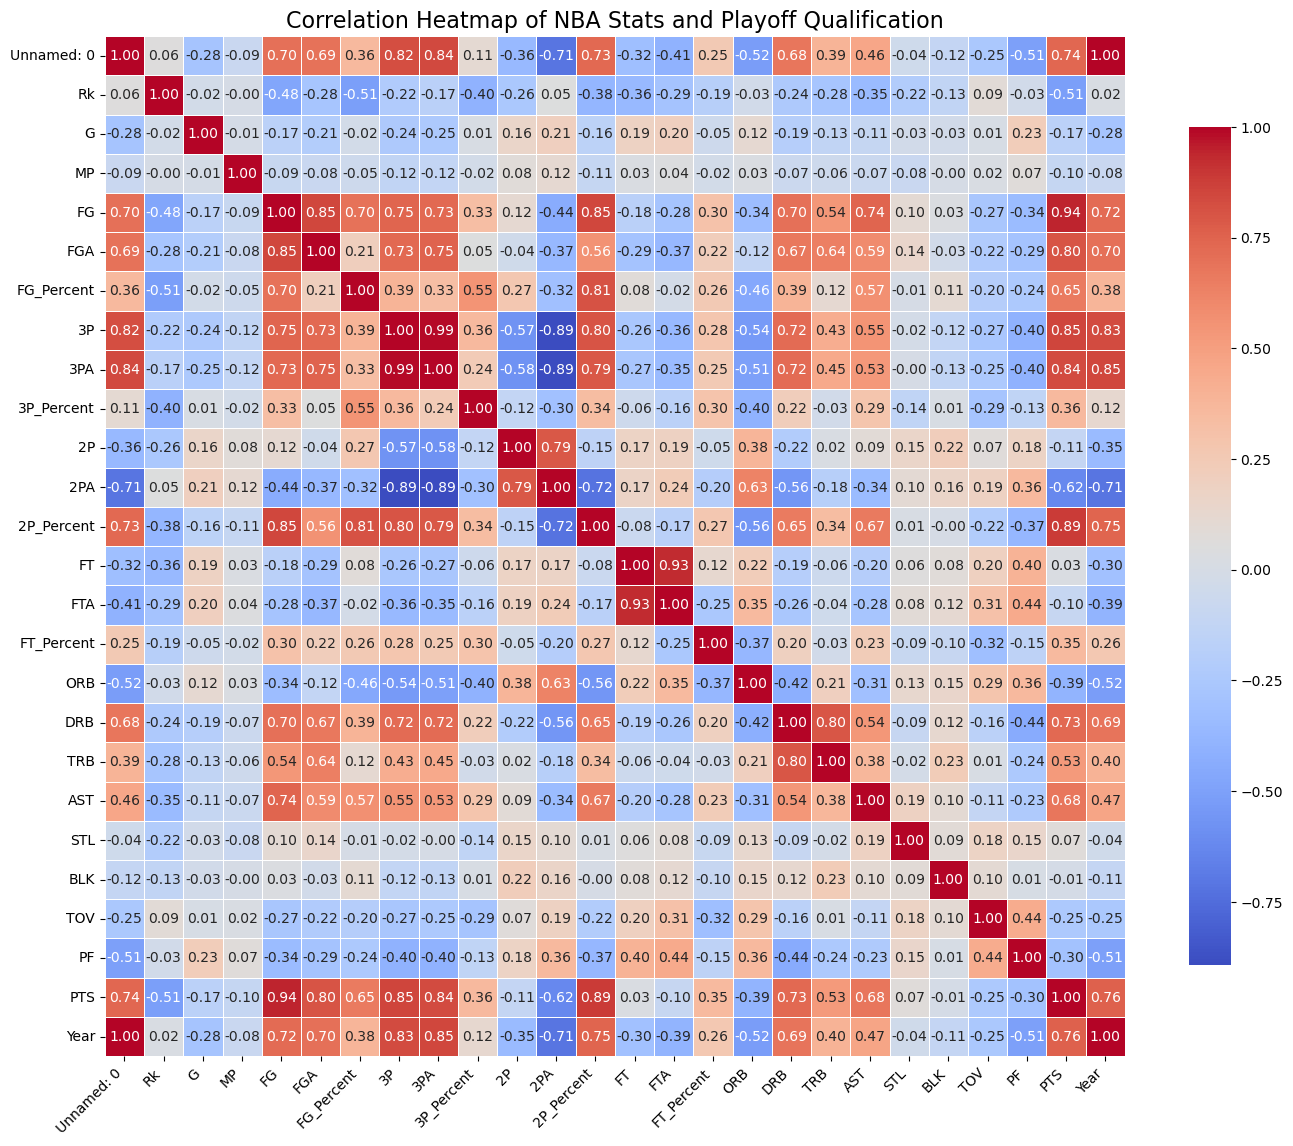

In [23]:
# Enable inline plotting
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("pergame_stats_total.csv")

# Mark playoff teams and clean team names
df["Playoff"] = df["Team"].str.contains(r"\*").astype(int)
df["Team"] = df["Team"].str.replace(r"\*", "", regex=True).str.strip()

# Select numeric columns only
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Generate a clean correlation heatmap
plt.figure(figsize=(14, 12))  # Bigger figure
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of NBA Stats and Playoff Qualification", fontsize=16)
plt.tight_layout()
plt.show()


In [25]:
# Select features
features = ['PTS', 'AST', 'TOV', 'FG_Percent', 'TRB', 'STL', 'BLK', '3P']
df = df[features + ['Playoff']].apply(pd.to_numeric, errors='coerce').dropna()

# Split data
X = df[features]
y = df['Playoff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Experiment 1: Simple Linear Regression (PTS, AST, TOV, FG%)

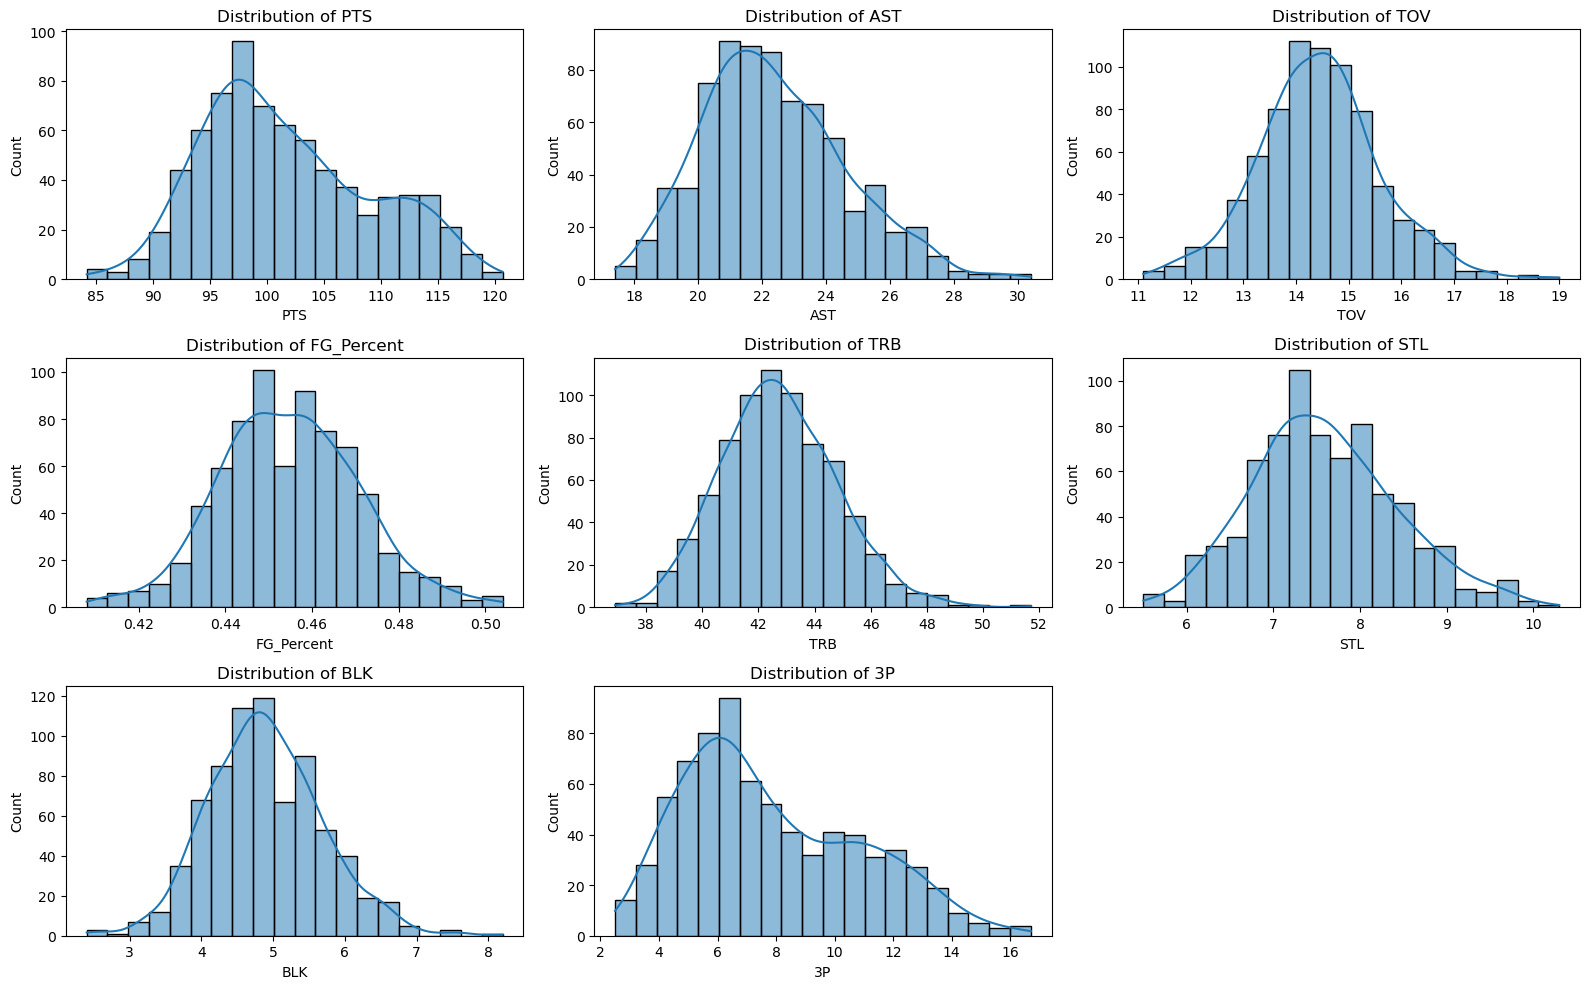

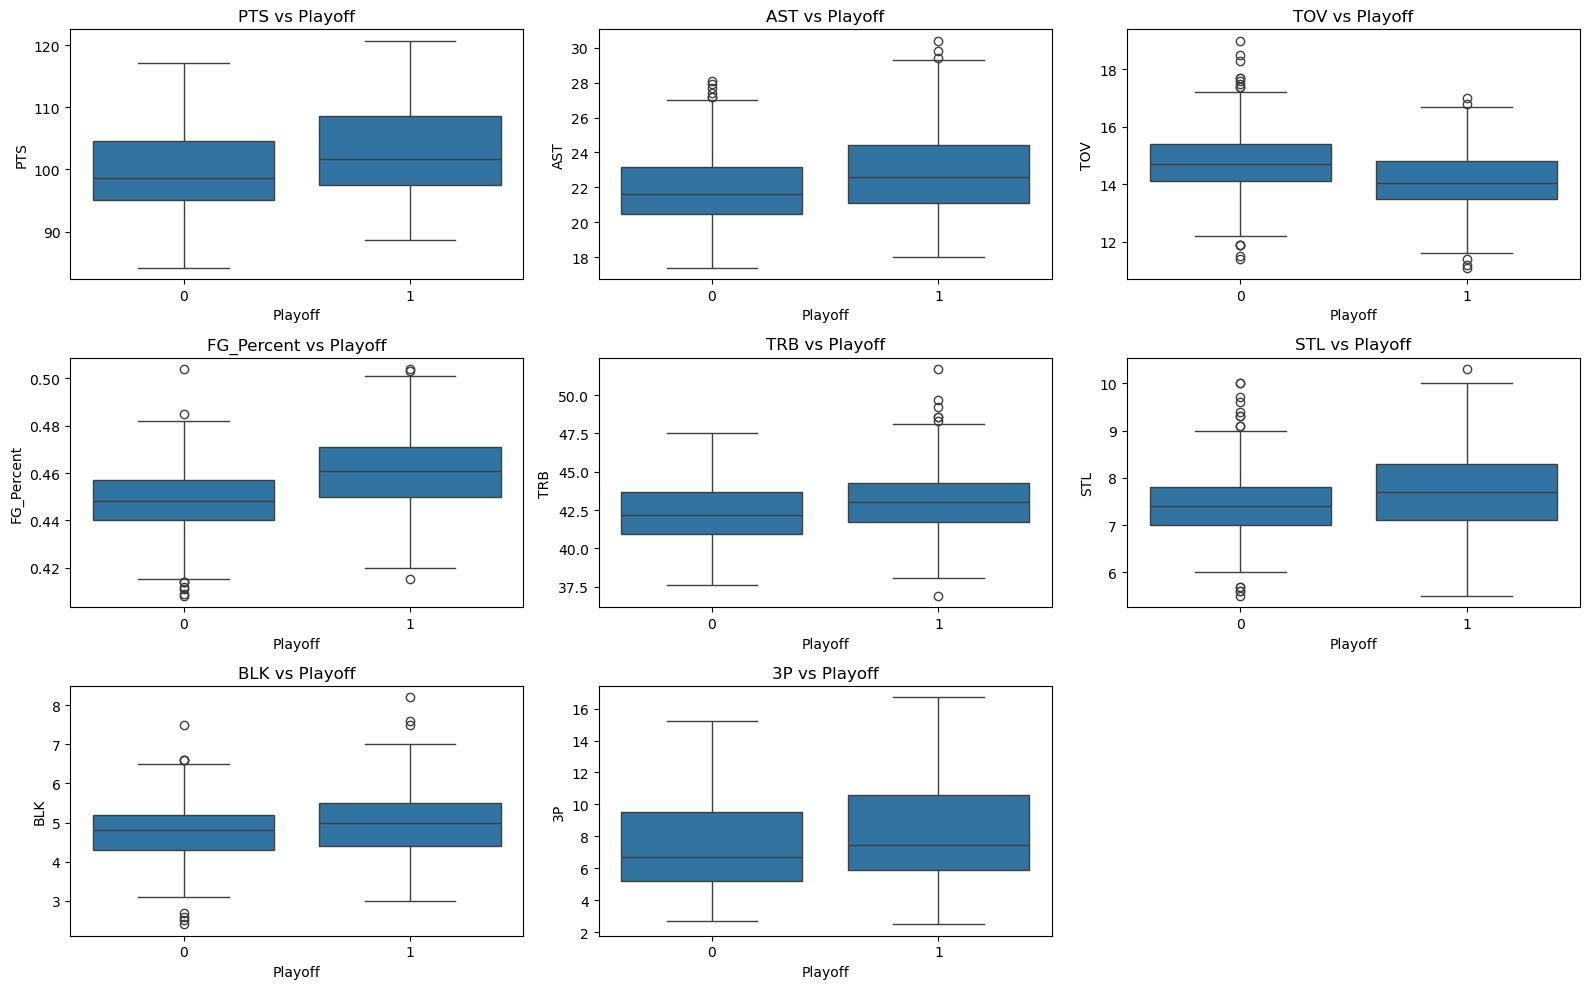

In [27]:
# Select meaningful features
features = ['PTS', 'AST', 'TOV', 'FG_Percent', 'TRB', 'STL', 'BLK', '3P']
df = df[features + ['Playoff']].apply(pd.to_numeric, errors='coerce').dropna()

# Split into features and target
X = df[features]
y = df['Playoff']

# Visualize distributions of all features
plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Visualize relationship between features and target (Playoff)
plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Playoff', y=col, data=df)
    plt.title(f"{col} vs Playoff")
plt.tight_layout()
plt.show()

# Split the data for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Experiment 2: Multiple Linear Regression (All Features)

R^2 Score: 0.4343
RMSE: 0.3752


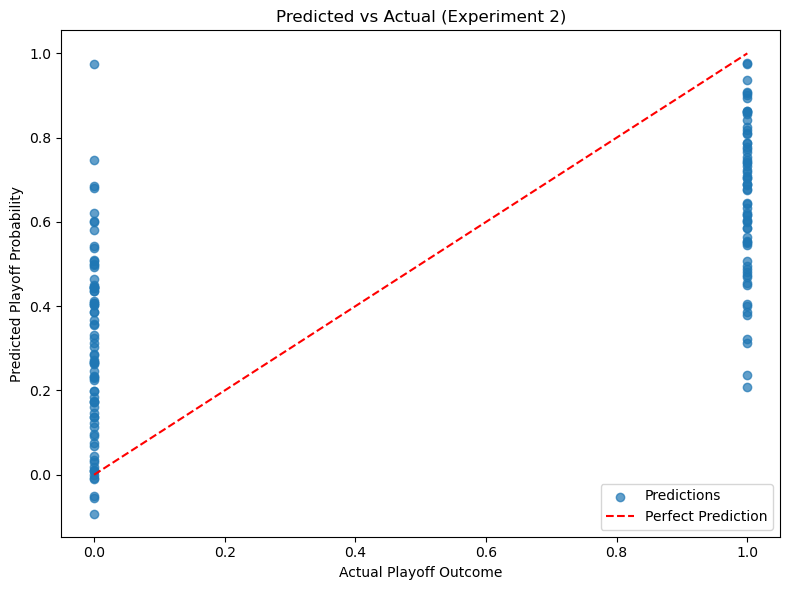

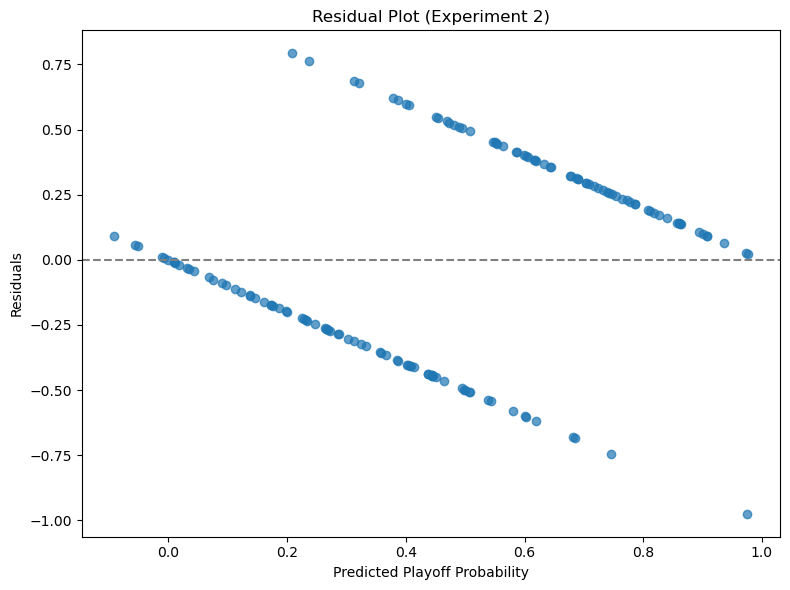

In [29]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the model
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

# Predict
y_pred2 = model2.predict(X_test_scaled)

# Evaluate
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f'R^2 Score: {r2_2:.4f}')
print(f'RMSE: {rmse_2:.4f}')

# 📈 Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, alpha=0.7, label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Playoff Outcome")
plt.ylabel("Predicted Playoff Probability")
plt.title("Predicted vs Actual (Experiment 2)")
plt.legend()
plt.tight_layout()
plt.show()

# 📉 Residual plot
residuals = y_test - y_pred2
plt.figure(figsize=(8, 6))
plt.scatter(y_pred2, residuals, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Predicted Playoff Probability")
plt.ylabel("Residuals")
plt.title("Residual Plot (Experiment 2)")
plt.tight_layout()
plt.show()


## Experiment 3: Polynomial Regression (Degree 3)

R^2 Score: 0.2717
RMSE: 0.4257


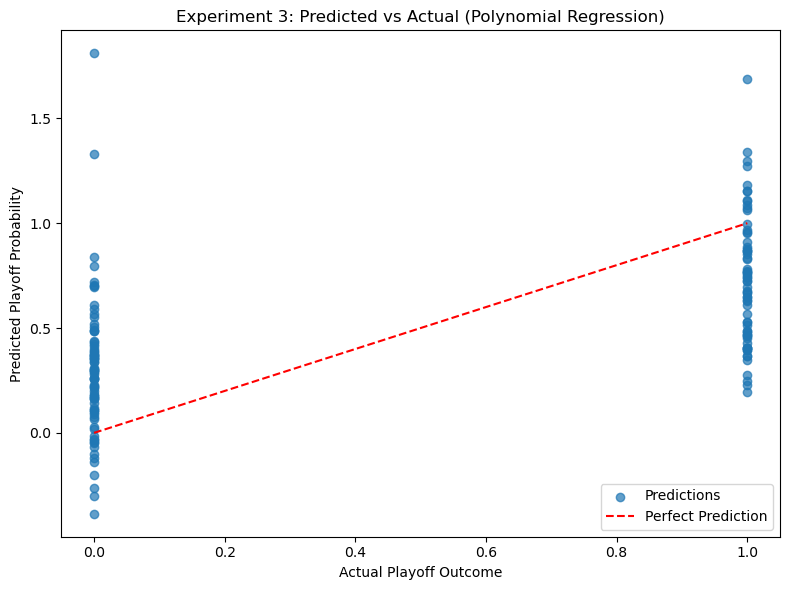

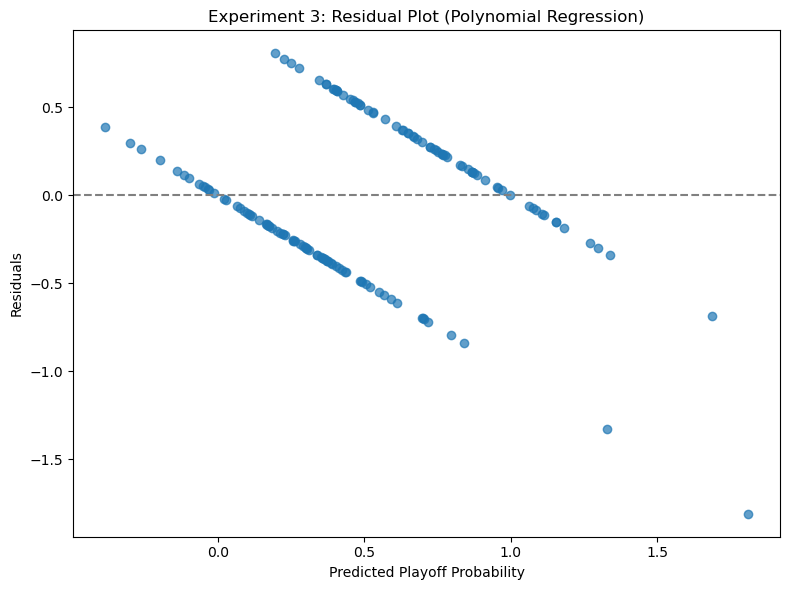

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial Regression Pipeline
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
])

# Train the model
poly_pipeline.fit(X_train, y_train)

# Predict
y_pred3 = poly_pipeline.predict(X_test)

# Evaluate
r2_3 = r2_score(y_test, y_pred3)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print(f'R^2 Score: {r2_3:.4f}')
print(f'RMSE: {rmse_3:.4f}')

# 📈 Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, alpha=0.7, label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Playoff Outcome")
plt.ylabel("Predicted Playoff Probability")
plt.title("Experiment 3: Predicted vs Actual (Polynomial Regression)")
plt.legend()
plt.tight_layout()
plt.show()

# 📉 Residual plot
residuals3 = y_test - y_pred3
plt.figure(figsize=(8, 6))
plt.scatter(y_pred3, residuals3, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Predicted Playoff Probability")
plt.ylabel("Residuals")
plt.title("Experiment 3: Residual Plot (Polynomial Regression)")
plt.tight_layout()
plt.show()
